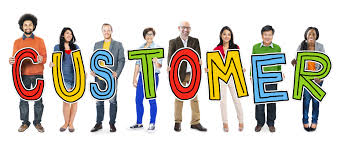

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
df=pd.read_csv('../input/predicting-profitable-customer-segments/customerTargeting.csv')

In [4]:
df.head(5)

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [5]:
df.shape

(6620, 71)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [7]:
df.isnull().sum()

g1_1      0
g1_2      0
g1_3      0
g1_4      0
g1_5      0
         ..
c_25      0
c_26      0
c_27      0
c_28      0
target    0
Length: 71, dtype: int64

In [8]:
df.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


In [9]:
import seaborn as sns

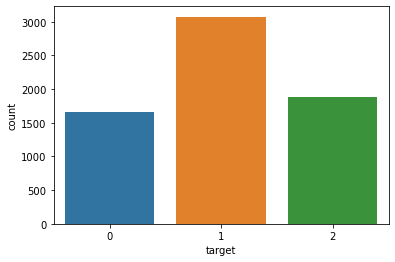

In [10]:
sns.countplot(df['target'])

In [11]:
df.value_counts(df['target'])

target
1    3076
2    1877
0    1667
dtype: int64

In [12]:
x=df.drop('target',axis=1)

In [13]:
y=df['target']

In [14]:
y

0       2
1       1
2       2
3       0
4       2
       ..
6615    1
6616    0
6617    1
6618    1
6619    0
Name: target, Length: 6620, dtype: int64

In [15]:
 from sklearn.ensemble import ExtraTreesClassifier

In [16]:
ec= ExtraTreesClassifier()

In [17]:
ec.fit(x,y)

ExtraTreesClassifier()

In [18]:
score=ec.feature_importances_

In [20]:
score=pd.Series(ec.feature_importances_,index=x.columns)

In [32]:
score=score.nlargest()

In [30]:
score

c_2     0.051755
c_4     0.027775
g1_1    0.026519
g2_1    0.023525
c_3     0.019326
dtype: float64

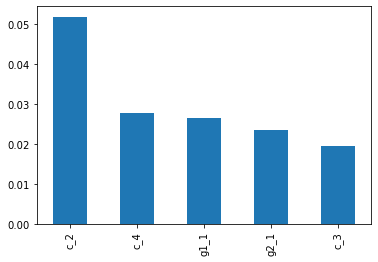

In [33]:
score.plot(kind='bar')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.20)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier()

In [40]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [56]:
rf.score(xtest,ytest)

0.5770392749244713

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr= LogisticRegression()

In [45]:
lr.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
lr.score(xtest,ytest)

0.5717522658610272

So we see that Logistic regression is not good on big data

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
df=DecisionTreeClassifier()

In [49]:
df.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [50]:
df.score(xtest,ytest)

0.452416918429003

In [52]:
from sklearn.svm import SVC

In [53]:
sv=SVC()

In [54]:
sv.fit(xtrain,ytrain)

SVC()

In [55]:
sv.score(xtest,ytest)

0.5717522658610272

So, we can see that, for big amount of datas Random Forest work well.